In [ ]:
import os
root_path = '/raid/ee-mariyam/maryam/abhijeet/Combined_Files'
def get_jpg_paths(base_dir):
    jpg_dict = {}
    
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            jpg_paths = []
            
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith('.jpg'):
                    file_path = os.path.join(folder_path, file_name)
                    jpg_paths.append(file_path)
            
            if jpg_paths:
                jpg_dict[folder_name] = jpg_paths
    
    return jpg_dict

combined_files_path = root_path
jpg_paths_dict = get_jpg_paths(combined_files_path)


In [2]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F 
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
def evaluate_model(model, val_loader):
    model.eval()
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    return all_labels, all_preds



In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, num_classes, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
def plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies):

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='green')
    plt.plot(val_accuracies, label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classwise_accuracy(cm, jpg_paths_dict):
    total_accuracy = np.trace(cm) / np.sum(cm)

    classwise_accuracy = cm.diagonal() / cm.sum(axis=1)

    class_names = list(jpg_paths_dict.keys())  
    classwise_accuracy = [
        acc if cm.sum(axis=1)[i] > 0 else np.nan
        for i, acc in enumerate(classwise_accuracy)
    ]

    print(f"Total Accuracy: {total_accuracy * 100:.2f}%")
    for i, accuracy in enumerate(classwise_accuracy):
        if np.isnan(accuracy):
            print(f"Class '{class_names[i]}' Accuracy: N/A (no samples)")
        else:
            print(f"Class '{class_names[i]}' Accuracy: {accuracy * 100:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.bar(class_names, classwise_accuracy, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 1)  
    plt.axhline(total_accuracy, color='red', linestyle='--', label='Total Accuracy')
    plt.xticks(rotation=45)  
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()  
    plt.show()

In [9]:
jpg_paths_comb_dict = jpg_paths_dict.copy()
anthra = jpg_paths_comb_dict['Anthracnose']
twist = jpg_paths_comb_dict['Twister']
antra_twist = anthra+twist
jpg_paths_comb_dict['Antracnose_Twister'] = antra_twist

jpg_paths_comb_dict.pop('Anthracnose', None)
jpg_paths_comb_dict.pop('Twister', None)


['/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3185.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3244.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6556.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094620957.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6553.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094709204.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3270.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 17.11.2023 DSC_6919.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 06.10.2023 IMG_20231006_163321~2.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 07.10.2023 IMG20231007113350.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S 

In [10]:
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    print(f"Subfolder: {subfolder}")
    print(f"Number of JPEG files: {len(jpg_files)}")
    print()

Subfolder: Purple_Blotch
Number of JPEG files: 406

Subfolder: Thrips
Number of JPEG files: 546

Subfolder: IYSV
Number of JPEG files: 754

Subfolder: Healthy
Number of JPEG files: 1072

Subfolder: Bulb Rot
Number of JPEG files: 669

Subfolder: Basal_Rot
Number of JPEG files: 140

Subfolder: Stemphylium
Number of JPEG files: 661

Subfolder: Antracnose_Twister
Number of JPEG files: 1082



In [ ]:

from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, jpg_files_dict, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._prepare_data(jpg_files_dict)

        self.default_transform = transforms.Compose([
            transforms.ToTensor(),  
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
        ])

    def _prepare_data(self, jpg_files_dict):
        for label_idx, (subfolder, file_paths) in enumerate(jpg_files_dict.items()):
            self.label_map[subfolder] = label_idx
            for file_path in file_paths:
                self.image_paths.append(file_path)
                self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, IOError) as e:
            print(f'Error loading image {img_path}: {e}')
            image = Image.new('RGB', (224, 224))  
            label = self.labels[idx]
        else:
            label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


In [ ]:
from PIL import Image
import numpy as np
import cv2

class BalancedDataset(CustomImageDataset):
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is None or image.size == 0:
                raise ValueError("Invalid image")
        except Exception:
            image = np.zeros((224, 224, 3), dtype=np.uint8) 

        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class DenseNet121WithCBAMandMLP(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.base = models.densenet121(pretrained=True)
        self.features = self.base.features
        
        self.cbam1 = CBAM(1024)
        self.cbam2 = CBAM(1024)
        
        self.mlp = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        features = self.features(x)                   
        features = self.cbam1(features)
        features = F.relu(features)
        features = self.cbam2(features)
        
        out = F.adaptive_avg_pool2d(features, (1, 1))
        out = torch.flatten(out, 1)                  
        return self.mlp(out)                      


In [ ]:
class CBAM(nn.Module):
    def __init__(self, channels, reduction_ratio=16):
        super().__init__()
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels//reduction_ratio, 1),
            nn.ReLU(),
            nn.Conv2d(channels//reduction_ratio, channels, 1),
            nn.Sigmoid()
        )
        
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(channels, 1, 7, padding=3),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        channel = self.channel_attention(x)
        x = x * channel
        spatial = self.spatial_attention(x)
        return x * spatial


In [15]:
import numpy as np
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import StratifiedKFold

dataset = BalancedDataset(jpg_files_dict=jpg_paths_comb_dict, transform=transform)

labels = np.array(dataset.labels)

num_total = len(dataset)
num_train_val = int(0.8 * num_total)
num_test = num_total - num_train_val
indices = np.arange(num_total)
np.random.seed(42)
np.random.shuffle(indices)

train_val_indices = indices[:num_train_val]
test_indices = indices[num_train_val:]

train_val_labels = labels[train_val_indices]
test_labels = labels[test_indices]
train_val_dataset = Subset(dataset, train_val_indices)
test_dataset = Subset(dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=64)


In [16]:

import numpy as np
import torch
class_counts = []
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    class_counts.append(len(jpg_files))
def compute_class_weights(label_map, dataset):
    print(class_counts)
    class_weights = np.max(class_counts) / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(class_weights)
    return class_weights

class_weights = compute_class_weights(dataset.label_map, dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights)


[406, 546, 754, 1072, 669, 140, 661, 1082]
tensor([2.6650, 1.9817, 1.4350, 1.0093, 1.6173, 7.7286, 1.6369, 1.0000],
       device='cuda:0')


In [17]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=5, fold=None, save_dir='./Models', final=False):
    best_acc = 0.0
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = corrects / total

        model.eval()
        val_running_loss = 0.0
        val_corrects = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_corrects += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_corrects / val_total

        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        train_accuracies.append(epoch_acc)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs} '
              f'Train Loss: {epoch_loss:.4f} Train Accuracy: {epoch_acc:.4f} '
              f'Val Loss: {val_loss:.4f} Val Accuracy: {val_acc:.4f}')

        if not final and val_acc > best_acc:
            best_acc = val_acc
            save_path = f'{save_dir}/model_fold_{fold}.pth'
            torch.save(model.state_dict(), save_path)
            print(f'Saved best model for fold {fold} with accuracy: {best_acc:.4f}')

    if final:
        save_path = f'{save_dir}/final_model.pth'
        torch.save(model.state_dict(), save_path)
        print(f'Final model saved to {save_path}')
    else:
        print(f'Best Validation Accuracy for fold {fold}: {best_acc:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies, (best_acc if not final else None)


In [ ]:
import torch
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
class_names = list(jpg_paths_comb_dict.keys())

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_train_losses = []
fold_val_losses = []
fold_train_accuracies = []
fold_val_accuracies = []
fold_best_accuracies = []

all_true_labels_cv = []
all_pred_labels_cv = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_indices, train_val_labels)):
    print(f"\n--- Fold {fold + 1} ---")

    fold_train_dataset = Subset(train_val_dataset, train_idx)
    fold_val_dataset = Subset(train_val_dataset, val_idx)

    train_loader = DataLoader(fold_train_dataset, batch_size=32, shuffle=True, num_workers=64)
    val_loader = DataLoader(fold_val_dataset, batch_size=32, shuffle=False, num_workers=64)

    model = DenseNet121WithCBAMandMLP(num_classes=8).to(device)
    criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    train_losses, val_losses, train_accs, val_accs, best_acc = train_model(
        model, train_loader, val_loader, criterion, optimizer, device,
        num_epochs=20, fold=fold, save_dir='./Models/CV/', final=False
    )

    fold_train_losses.append(train_losses[-1])
    fold_val_losses.append(val_losses[-1])
    fold_train_accuracies.append(train_accs[-1])
    fold_val_accuracies.append(val_accs[-1])
    fold_best_accuracies.append(best_acc)

    model.eval()
    val_true_labels = []
    val_pred_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_true_labels.extend(labels.cpu().numpy())
            val_pred_labels.extend(preds.cpu().numpy())

    all_true_labels_cv.extend(val_true_labels)
    all_pred_labels_cv.extend(val_pred_labels)

print("\n=== Cross Validation Metrics ===")
print(f"Overall CV Accuracy: {accuracy_score(all_true_labels_cv, all_pred_labels_cv):.4f}")
print(classification_report(all_true_labels_cv, all_pred_labels_cv, target_names=class_names))



--- Fold 1 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.4807 Train Accuracy: 0.5731 Val Loss: 0.7165 Val Accuracy: 0.8030
Saved best model for fold 0 with accuracy: 0.8030


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.4830 Train Accuracy: 0.8590 Val Loss: 0.3110 Val Accuracy: 0.8933
Saved best model for fold 0 with accuracy: 0.8933


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Traceback (most recent call last):
Exception ignored in: <function _ConnectionBase.__del__ at 0x7f659abc48b0>
Traceback (most recent call last):
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/multiprocessing/connection.py", line 132, in __del__
Traceback (most recent call last):
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/multiprocessing/queues.py", line 235, in _feed
    close()
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/multiprocessing/queue

Epoch 3/20 Train Loss: 0.1846 Train Accuracy: 0.9370 Val Loss: 0.3052 Val Accuracy: 0.9226
Saved best model for fold 0 with accuracy: 0.9226


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.1101 Train Accuracy: 0.9642 Val Loss: 0.3042 Val Accuracy: 0.9390
Saved best model for fold 0 with accuracy: 0.9390


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0474 Train Accuracy: 0.9845 Val Loss: 0.3465 Val Accuracy: 0.9461
Saved best model for fold 0 with accuracy: 0.9461


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0380 Train Accuracy: 0.9921 Val Loss: 0.3001 Val Accuracy: 0.9543
Saved best model for fold 0 with accuracy: 0.9543


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0254 Train Accuracy: 0.9930 Val Loss: 0.3876 Val Accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0178 Train Accuracy: 0.9959 Val Loss: 0.4445 Val Accuracy: 0.9449


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0281 Train Accuracy: 0.9927 Val Loss: 0.5662 Val Accuracy: 0.9285


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0318 Train Accuracy: 0.9903 Val Loss: 0.5711 Val Accuracy: 0.9379


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0676 Train Accuracy: 0.9839 Val Loss: 0.3891 Val Accuracy: 0.9379


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0325 Train Accuracy: 0.9894 Val Loss: 0.4888 Val Accuracy: 0.9320


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0215 Train Accuracy: 0.9924 Val Loss: 0.4428 Val Accuracy: 0.9332


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0479 Train Accuracy: 0.9812 Val Loss: 0.4594 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0232 Train Accuracy: 0.9938 Val Loss: 0.4708 Val Accuracy: 0.9367


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0073 Train Accuracy: 0.9988 Val Loss: 0.4695 Val Accuracy: 0.9531


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0123 Train Accuracy: 0.9968 Val Loss: 0.4648 Val Accuracy: 0.9461


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0183 Train Accuracy: 0.9950 Val Loss: 0.5052 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0162 Train Accuracy: 0.9947 Val Loss: 0.5012 Val Accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0136 Train Accuracy: 0.9950 Val Loss: 0.5617 Val Accuracy: 0.9426
Best Validation Accuracy for fold 0: 0.9543


Corrupt JPEG data: premature end of data segment



--- Fold 2 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.3845 Train Accuracy: 0.5696 Val Loss: 0.5716 Val Accuracy: 0.8535
Saved best model for fold 1 with accuracy: 0.8535


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.4198 Train Accuracy: 0.8657 Val Loss: 0.3028 Val Accuracy: 0.8863
Saved best model for fold 1 with accuracy: 0.8863


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.2366 Train Accuracy: 0.9188 Val Loss: 0.2564 Val Accuracy: 0.9308
Saved best model for fold 1 with accuracy: 0.9308


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.1065 Train Accuracy: 0.9654 Val Loss: 0.3133 Val Accuracy: 0.9414
Saved best model for fold 1 with accuracy: 0.9414


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0460 Train Accuracy: 0.9874 Val Loss: 0.2866 Val Accuracy: 0.9496
Saved best model for fold 1 with accuracy: 0.9496


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0240 Train Accuracy: 0.9938 Val Loss: 0.3477 Val Accuracy: 0.9250


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0304 Train Accuracy: 0.9903 Val Loss: 0.2920 Val Accuracy: 0.9367


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0383 Train Accuracy: 0.9886 Val Loss: 0.3316 Val Accuracy: 0.9355


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0293 Train Accuracy: 0.9894 Val Loss: 0.3869 Val Accuracy: 0.9449


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0319 Train Accuracy: 0.9886 Val Loss: 0.3186 Val Accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0108 Train Accuracy: 0.9971 Val Loss: 0.2854 Val Accuracy: 0.9461


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0372 Train Accuracy: 0.9877 Val Loss: 0.3231 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0180 Train Accuracy: 0.9930 Val Loss: 0.3004 Val Accuracy: 0.9496


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0288 Train Accuracy: 0.9906 Val Loss: 0.3197 Val Accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0615 Train Accuracy: 0.9836 Val Loss: 0.2717 Val Accuracy: 0.9461


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0382 Train Accuracy: 0.9874 Val Loss: 0.2796 Val Accuracy: 0.9531
Saved best model for fold 1 with accuracy: 0.9531


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0081 Train Accuracy: 0.9982 Val Loss: 0.2532 Val Accuracy: 0.9543
Saved best model for fold 1 with accuracy: 0.9543


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0025 Train Accuracy: 0.9997 Val Loss: 0.2495 Val Accuracy: 0.9578
Saved best model for fold 1 with accuracy: 0.9578


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0208 Train Accuracy: 0.9936 Val Loss: 0.2862 Val Accuracy: 0.9578


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0112 Train Accuracy: 0.9953 Val Loss: 0.4242 Val Accuracy: 0.9355
Best Validation Accuracy for fold 1: 0.9578


Corrupt JPEG data: premature end of data segment



--- Fold 3 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.3296 Train Accuracy: 0.6277 Val Loss: 0.5095 Val Accuracy: 0.8206
Saved best model for fold 2 with accuracy: 0.8206


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.3752 Train Accuracy: 0.8704 Val Loss: 0.2783 Val Accuracy: 0.9004
Saved best model for fold 2 with accuracy: 0.9004


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.1910 Train Accuracy: 0.9343 Val Loss: 0.2426 Val Accuracy: 0.9285
Saved best model for fold 2 with accuracy: 0.9285


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.1063 Train Accuracy: 0.9636 Val Loss: 0.3453 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0573 Train Accuracy: 0.9836 Val Loss: 0.2286 Val Accuracy: 0.9496
Saved best model for fold 2 with accuracy: 0.9496


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0373 Train Accuracy: 0.9909 Val Loss: 0.2174 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0291 Train Accuracy: 0.9918 Val Loss: 0.2501 Val Accuracy: 0.9519
Saved best model for fold 2 with accuracy: 0.9519


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0165 Train Accuracy: 0.9953 Val Loss: 0.2753 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0143 Train Accuracy: 0.9965 Val Loss: 0.2721 Val Accuracy: 0.9555
Saved best model for fold 2 with accuracy: 0.9555


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0054 Train Accuracy: 0.9979 Val Loss: 0.3010 Val Accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0725 Train Accuracy: 0.9786 Val Loss: 0.7427 Val Accuracy: 0.9132


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.1018 Train Accuracy: 0.9675 Val Loss: 0.3293 Val Accuracy: 0.9308


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0438 Train Accuracy: 0.9853 Val Loss: 0.4277 Val Accuracy: 0.9250


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0421 Train Accuracy: 0.9853 Val Loss: 0.2862 Val Accuracy: 0.9566
Saved best model for fold 2 with accuracy: 0.9566


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0114 Train Accuracy: 0.9962 Val Loss: 0.2544 Val Accuracy: 0.9613
Saved best model for fold 2 with accuracy: 0.9613


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0061 Train Accuracy: 0.9985 Val Loss: 0.2814 Val Accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0042 Train Accuracy: 0.9985 Val Loss: 0.3440 Val Accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0048 Train Accuracy: 0.9991 Val Loss: 0.2948 Val Accuracy: 0.9496


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0100 Train Accuracy: 0.9968 Val Loss: 0.3405 Val Accuracy: 0.9519


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0081 Train Accuracy: 0.9982 Val Loss: 0.2997 Val Accuracy: 0.9496
Best Validation Accuracy for fold 2: 0.9613


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment



--- Fold 4 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.4003 Train Accuracy: 0.5717 Val Loss: 0.6631 Val Accuracy: 0.8206
Saved best model for fold 3 with accuracy: 0.8206


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.3882 Train Accuracy: 0.8731 Val Loss: 0.4079 Val Accuracy: 0.8640
Saved best model for fold 3 with accuracy: 0.8640


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.1660 Train Accuracy: 0.9434 Val Loss: 0.3863 Val Accuracy: 0.9132
Saved best model for fold 3 with accuracy: 0.9132


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.0709 Train Accuracy: 0.9783 Val Loss: 0.3008 Val Accuracy: 0.9261
Saved best model for fold 3 with accuracy: 0.9261


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0504 Train Accuracy: 0.9853 Val Loss: 0.2770 Val Accuracy: 0.9273
Saved best model for fold 3 with accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0311 Train Accuracy: 0.9906 Val Loss: 0.3573 Val Accuracy: 0.9355
Saved best model for fold 3 with accuracy: 0.9355


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0161 Train Accuracy: 0.9959 Val Loss: 0.3468 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0283 Train Accuracy: 0.9892 Val Loss: 0.4562 Val Accuracy: 0.9355


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0738 Train Accuracy: 0.9757 Val Loss: 0.3829 Val Accuracy: 0.9320


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0789 Train Accuracy: 0.9748 Val Loss: 0.3609 Val Accuracy: 0.9109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0362 Train Accuracy: 0.9877 Val Loss: 0.3656 Val Accuracy: 0.9250


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0146 Train Accuracy: 0.9953 Val Loss: 0.3611 Val Accuracy: 0.9285


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0169 Train Accuracy: 0.9977 Val Loss: 0.3967 Val Accuracy: 0.9121


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0293 Train Accuracy: 0.9903 Val Loss: 0.3661 Val Accuracy: 0.9308


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0134 Train Accuracy: 0.9953 Val Loss: 0.3585 Val Accuracy: 0.9261


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0112 Train Accuracy: 0.9959 Val Loss: 0.4195 Val Accuracy: 0.9402
Saved best model for fold 3 with accuracy: 0.9402


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0050 Train Accuracy: 0.9985 Val Loss: 0.3974 Val Accuracy: 0.9320


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0048 Train Accuracy: 0.9982 Val Loss: 0.3914 Val Accuracy: 0.9414
Saved best model for fold 3 with accuracy: 0.9414


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0031 Train Accuracy: 0.9985 Val Loss: 0.4261 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0067 Train Accuracy: 0.9994 Val Loss: 0.4178 Val Accuracy: 0.9390
Best Validation Accuracy for fold 3: 0.9414

--- Fold 5 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.4085 Train Accuracy: 0.4956 Val Loss: 0.7338 Val Accuracy: 0.8404
Saved best model for fold 4 with accuracy: 0.8404


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.4861 Train Accuracy: 0.8529 Val Loss: 0.3214 Val Accuracy: 0.8967
Saved best model for fold 4 with accuracy: 0.8967


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.2184 Train Accuracy: 0.9256 Val Loss: 0.2663 Val Accuracy: 0.9108
Saved best model for fold 4 with accuracy: 0.9108


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.1197 Train Accuracy: 0.9610 Val Loss: 0.2665 Val Accuracy: 0.9225
Saved best model for fold 4 with accuracy: 0.9225


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0774 Train Accuracy: 0.9751 Val Loss: 0.3342 Val Accuracy: 0.9343
Saved best model for fold 4 with accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0404 Train Accuracy: 0.9892 Val Loss: 0.3699 Val Accuracy: 0.9354
Saved best model for fold 4 with accuracy: 0.9354


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0283 Train Accuracy: 0.9941 Val Loss: 0.4317 Val Accuracy: 0.9413
Saved best model for fold 4 with accuracy: 0.9413


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0236 Train Accuracy: 0.9950 Val Loss: 0.3937 Val Accuracy: 0.9460
Saved best model for fold 4 with accuracy: 0.9460


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0154 Train Accuracy: 0.9959 Val Loss: 0.3774 Val Accuracy: 0.9460


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0393 Train Accuracy: 0.9874 Val Loss: 0.4693 Val Accuracy: 0.9378


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0498 Train Accuracy: 0.9871 Val Loss: 0.3357 Val Accuracy: 0.9319


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0382 Train Accuracy: 0.9909 Val Loss: 0.5088 Val Accuracy: 0.9472
Saved best model for fold 4 with accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0177 Train Accuracy: 0.9950 Val Loss: 0.5204 Val Accuracy: 0.9319


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0208 Train Accuracy: 0.9965 Val Loss: 0.4262 Val Accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0069 Train Accuracy: 0.9985 Val Loss: 0.3625 Val Accuracy: 0.9460


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0019 Train Accuracy: 0.9997 Val Loss: 0.4027 Val Accuracy: 0.9448


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0026 Train Accuracy: 0.9988 Val Loss: 0.4093 Val Accuracy: 0.9413


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0028 Train Accuracy: 0.9991 Val Loss: 0.4316 Val Accuracy: 0.9401


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0148 Train Accuracy: 0.9950 Val Loss: 0.4435 Val Accuracy: 0.9354


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0548 Train Accuracy: 0.9818 Val Loss: 0.5210 Val Accuracy: 0.9237
Best Validation Accuracy for fold 4: 0.9472

=== Cross Validation Metrics ===
Overall CV Accuracy: 0.9381
                    precision    recall  f1-score   support

     Purple_Blotch       0.78      0.76      0.77       337
            Thrips       0.98      0.99      0.99       443
              IYSV       1.00      0.99      0.99       614
           Healthy       0.98      0.99      0.98       851
          Bulb Rot       1.00      1.00      1.00       509
         Basal_Rot       0.79      0.66      0.72       105
       Stemphylium       0.83      0.87      0.85       536
Antracnose_Twister       0.94      0.93      0.94       869

          accuracy                           0.94      4264
         macro avg       0.91      0.90      0.90      4264
      weighted avg       0.94      0.94      0.94      4264



In [24]:
import numpy as np

print("\n=== 5-Fold Cross Validation Summary ===")
print(f"Average Train Accuracy: {np.mean(fold_train_accuracies):.4f} ± {np.std(fold_train_accuracies):.4f}")
print(f"Average Val Accuracy:   {np.mean(fold_val_accuracies):.4f} ± {np.std(fold_val_accuracies):.4f}")
print(f"Average Train Loss:     {np.mean(fold_train_losses):.4f} ± {np.std(fold_train_losses):.4f}")
print(f"Average Val Loss:       {np.mean(fold_val_losses):.4f} ± {np.std(fold_val_losses):.4f}")



=== 5-Fold Cross Validation Summary ===
Average Train Accuracy: 0.9940 ± 0.0063
Average Val Accuracy:   0.9381 ± 0.0086
Average Train Loss:     0.0189 ± 0.0181
Average Val Loss:       0.4449 ± 0.0913


In [ ]:
import torch
import time
import copy
import os

def train_model_v2(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=5, fold=None, save_dir='./Models', final=False):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 30)

        model.train()
        running_loss = 0.0
        running_corrects = 0
        total = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = running_corrects.double() / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            val_corrects = 0
            val_total = 0

            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)
                    val_loss += loss.item() * inputs.size(0)
                    val_corrects += torch.sum(preds == labels.data)
                    val_total += labels.size(0)

            epoch_val_loss = val_loss / val_total
            epoch_val_acc = val_corrects.double() / val_total
            val_losses.append(epoch_val_loss)
            val_accuracies.append(epoch_val_acc.item())

            print(f'Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')

            if not final and epoch_val_acc > best_acc:
                best_acc = epoch_val_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                os.makedirs(save_dir, exist_ok=True)
                save_path = os.path.join(save_dir, f'model_fold_cbam_{fold}.pth')
                torch.save(best_model_wts, save_path)
                print(f'--> Best model saved for fold {fold} with acc {best_acc:.4f}')
        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    if final:
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, 'final_model_cbam.pth')
        torch.save(model.state_dict(), save_path)
        print(f'Final model saved to {save_path}')
    elif best_acc > 0.0:
        model.load_state_dict(best_model_wts)
        print(f'Loaded best model weights with acc: {best_acc:.4f}')
        return train_losses, val_losses, train_accuracies, val_accuracies, best_acc
    else:
        print(f'No validation provided. Final training metrics only.')

    return train_losses, val_losses, train_accuracies, val_accuracies

Epoch 1/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 1.1708 Acc: 0.6902

Epoch 2/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.3553 Acc: 0.8792

Epoch 3/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.1843 Acc: 0.9414

Epoch 4/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.1046 Acc: 0.9667

Epoch 5/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0543 Acc: 0.9833

Epoch 6/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0417 Acc: 0.9866

Epoch 7/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0322 Acc: 0.9906

Epoch 8/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0214 Acc: 0.9932

Epoch 9/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0243 Acc: 0.9916

Epoch 10/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0380 Acc: 0.9887

Epoch 11/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0742 Acc: 0.9758

Epoch 12/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0131 Acc: 0.9965

Epoch 13/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0180 Acc: 0.9953

Epoch 14/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0043 Acc: 0.9991

Epoch 15/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0096 Acc: 0.9981

Epoch 16/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0062 Acc: 0.9988

Epoch 17/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0070 Acc: 0.9979

Epoch 18/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0273 Acc: 0.9909

Epoch 19/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0875 Acc: 0.9730

Epoch 20/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0278 Acc: 0.9899

Training complete in 30m 1s
Final model saved to ./Models/final_model_cbam.pth
Saved final model to ./Models/final_model.pth


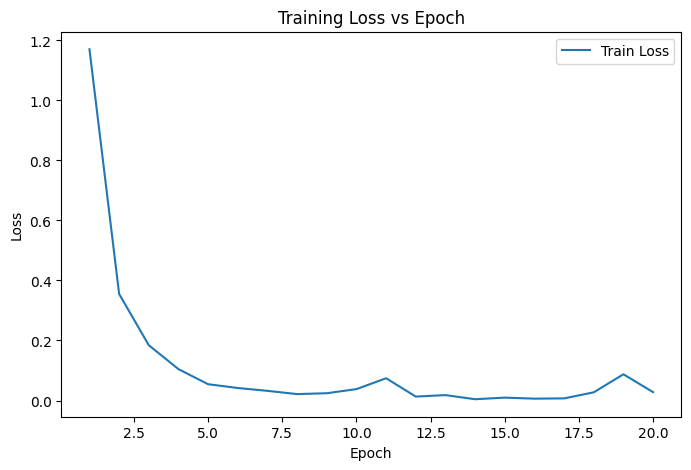

In [ ]:
import matplotlib.pyplot as plt
import os

full_train_loader = DataLoader(train_val_dataset, batch_size=32, shuffle=True, num_workers=64)

final_model = DenseNet121WithCBAMandMLP(num_classes=8).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(final_model.parameters(), lr=1e-4)

train_losses, val_losses, train_accs, val_accs = train_model_v2(
    model=final_model,
    train_loader=full_train_loader,
    val_loader=None,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=20,
    final=True,
    save_dir='./Models'
)


os.makedirs('./Models', exist_ok=True)
torch.save(final_model.state_dict(), './Models/final_model_only_cbam.pth')
print("Saved final model to ./Models/final_model.pth")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.legend()
plt.show()


In [30]:
final_model.eval()
all_true = []
all_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = final_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_true.extend(labels.cpu().numpy())
        all_pred.extend(preds.cpu().numpy())


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Test Accuracy: 0.9531

Classification Report:
                    precision    recall  f1-score   support

     Purple_Blotch       0.70      0.93      0.80        69
            Thrips       0.99      0.99      0.99       103
              IYSV       0.99      1.00      1.00       140
           Healthy       0.99      0.99      0.99       221
          Bulb Rot       1.00      0.99      1.00       160
         Basal_Rot       0.84      0.91      0.88        35
       Stemphylium       0.95      0.84      0.89       125
Antracnose_Twister       0.97      0.92      0.94       213

          accuracy                           0.95      1066
         macro avg       0.93      0.95      0.94      1066
      weighted avg       0.96      0.95      0.95      1066



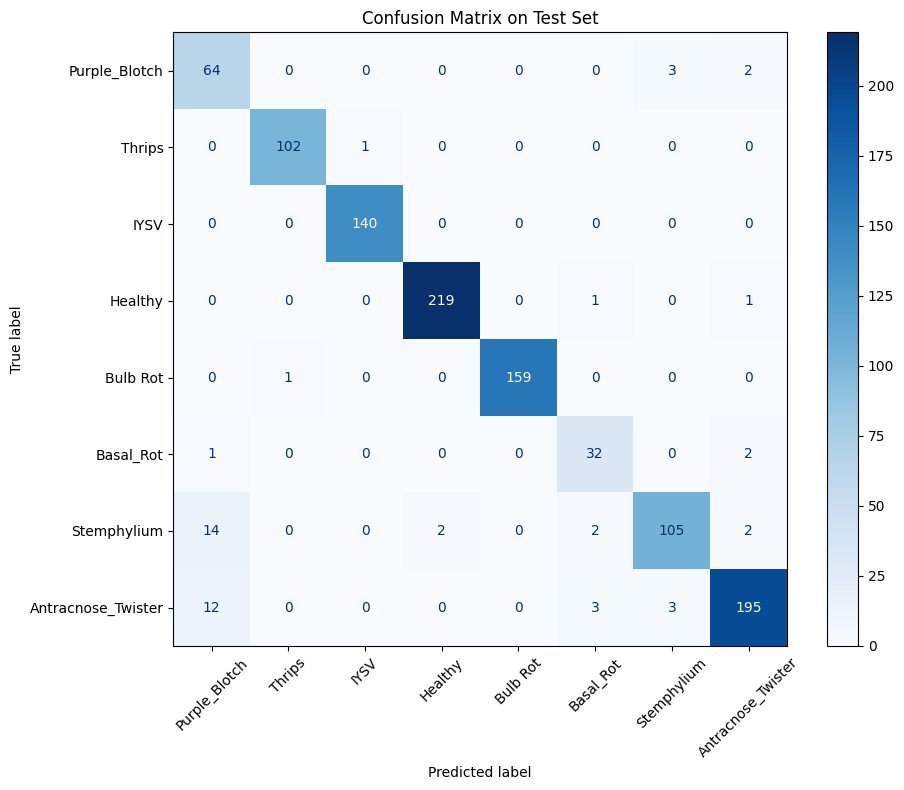

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

acc = accuracy_score(all_true, all_pred)
print(f"Test Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(all_true, all_pred, target_names=dataset.label_map.keys()))

cm = confusion_matrix(all_true, all_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(dataset.label_map.keys()))

fig, ax = plt.subplots(figsize=(10,8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.tight_layout()
plt.show()


In [ ]:

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    best_acc = 0.0
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = corrects / total

        model.eval()
        val_running_loss = 0.0
        val_corrects = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_running_loss += loss.item() * inputs.size(0)
                
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_corrects += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_corrects / val_total

        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        train_accuracies.append(epoch_acc)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs} '
              f'Train Loss: {epoch_loss:.4f} Train Accuracy: {epoch_acc:.4f} '
              f'Val Loss: {val_loss:.4f} Val Accuracy: {val_acc:.4f}')

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), './Models/densenet_only_cbam.pth')
            print(f'Saved best model with accuracy: {best_acc:.4f}')

    print('Training complete.')
    print(f'Best Validation Accuracy: {best_acc:.4f}')
    return train_losses, val_losses, train_accuracies, val_accuracies





In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = BalancedDataset(jpg_files_dict=jpg_paths_comb_dict, transform=transform)

In [ ]:

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=64)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=64)

In [ ]:

model = DenseNet121WithCBAM(num_classes=len(jpg_paths_comb_dict)).to(device)

In [20]:

import numpy as np
import torch
class_counts = []
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    class_counts.append(len(jpg_files))
def compute_class_weights(label_map, dataset):
    print(class_counts)
    class_weights = np.max(class_counts) / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(class_weights)
    return class_weights

class_weights = compute_class_weights(dataset.label_map, dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights)


[406, 546, 754, 1072, 669, 140, 661, 1082]
tensor([2.6650, 1.9817, 1.4350, 1.0093, 1.6173, 7.7286, 1.6369, 1.0000],
       device='cuda:0')


In [ ]:

optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=30)


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/30 Train Loss: 0.8521 Train Accuracy: 0.7129 Val Loss: 0.8737 Val Accuracy: 0.6341
Saved best model with accuracy: 0.6341


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/30 Train Loss: 0.4745 Train Accuracy: 0.8375 Val Loss: 0.6347 Val Accuracy: 0.7364
Saved best model with accuracy: 0.7364


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/30 Train Loss: 0.3704 Train Accuracy: 0.8675 Val Loss: 0.4920 Val Accuracy: 0.7908
Saved best model with accuracy: 0.7908


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/30 Train Loss: 0.2973 Train Accuracy: 0.8954 Val Loss: 0.4252 Val Accuracy: 0.8180
Saved best model with accuracy: 0.8180


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/30 Train Loss: 0.2234 Train Accuracy: 0.9160 Val Loss: 0.4088 Val Accuracy: 0.8349
Saved best model with accuracy: 0.8349


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/30 Train Loss: 0.1532 Train Accuracy: 0.9435 Val Loss: 0.6434 Val Accuracy: 0.7786


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/30 Train Loss: 0.2651 Train Accuracy: 0.9088 Val Loss: 0.5160 Val Accuracy: 0.8565
Saved best model with accuracy: 0.8565


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/30 Train Loss: 0.1075 Train Accuracy: 0.9580 Val Loss: 0.2774 Val Accuracy: 0.9137
Saved best model with accuracy: 0.9137


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/30 Train Loss: 0.1360 Train Accuracy: 0.9533 Val Loss: 0.7316 Val Accuracy: 0.8002


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/30 Train Loss: 0.1454 Train Accuracy: 0.9468 Val Loss: 0.3468 Val Accuracy: 0.9109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/30 Train Loss: 0.1298 Train Accuracy: 0.9547 Val Loss: 0.4119 Val Accuracy: 0.9024


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/30 Train Loss: 0.0595 Train Accuracy: 0.9817 Val Loss: 0.3303 Val Accuracy: 0.9353
Saved best model with accuracy: 0.9353


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/30 Train Loss: 0.0204 Train Accuracy: 0.9939 Val Loss: 0.4640 Val Accuracy: 0.9203


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/30 Train Loss: 0.0286 Train Accuracy: 0.9918 Val Loss: 0.3527 Val Accuracy: 0.9128


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/30 Train Loss: 0.0270 Train Accuracy: 0.9906 Val Loss: 0.4887 Val Accuracy: 0.8968


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/30 Train Loss: 0.1855 Train Accuracy: 0.9376 Val Loss: 0.9284 Val Accuracy: 0.7645


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/30 Train Loss: 0.1460 Train Accuracy: 0.9461 Val Loss: 0.3340 Val Accuracy: 0.9024


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/30 Train Loss: 0.0261 Train Accuracy: 0.9918 Val Loss: 0.3386 Val Accuracy: 0.9362
Saved best model with accuracy: 0.9362


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/30 Train Loss: 0.0103 Train Accuracy: 0.9967 Val Loss: 0.2917 Val Accuracy: 0.9465
Saved best model with accuracy: 0.9465


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/30 Train Loss: 0.0021 Train Accuracy: 0.9998 Val Loss: 0.2946 Val Accuracy: 0.9475
Saved best model with accuracy: 0.9475


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 21/30 Train Loss: 0.0013 Train Accuracy: 1.0000 Val Loss: 0.2989 Val Accuracy: 0.9456


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 22/30 Train Loss: 0.0006 Train Accuracy: 1.0000 Val Loss: 0.3045 Val Accuracy: 0.9493
Saved best model with accuracy: 0.9493


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 23/30 Train Loss: 0.0003 Train Accuracy: 1.0000 Val Loss: 0.3035 Val Accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 24/30 Train Loss: 0.0002 Train Accuracy: 1.0000 Val Loss: 0.3040 Val Accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 25/30 Train Loss: 0.0002 Train Accuracy: 1.0000 Val Loss: 0.3050 Val Accuracy: 0.9493


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 26/30 Train Loss: 0.0002 Train Accuracy: 1.0000 Val Loss: 0.3063 Val Accuracy: 0.9503
Saved best model with accuracy: 0.9503


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 27/30 Train Loss: 0.0001 Train Accuracy: 1.0000 Val Loss: 0.3077 Val Accuracy: 0.9503


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 28/30 Train Loss: 0.0001 Train Accuracy: 1.0000 Val Loss: 0.3094 Val Accuracy: 0.9512
Saved best model with accuracy: 0.9512


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 29/30 Train Loss: 0.0001 Train Accuracy: 1.0000 Val Loss: 0.3112 Val Accuracy: 0.9512


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 30/30 Train Loss: 0.0001 Train Accuracy: 1.0000 Val Loss: 0.3134 Val Accuracy: 0.9512
Training complete.
Best Validation Accuracy: 0.9512


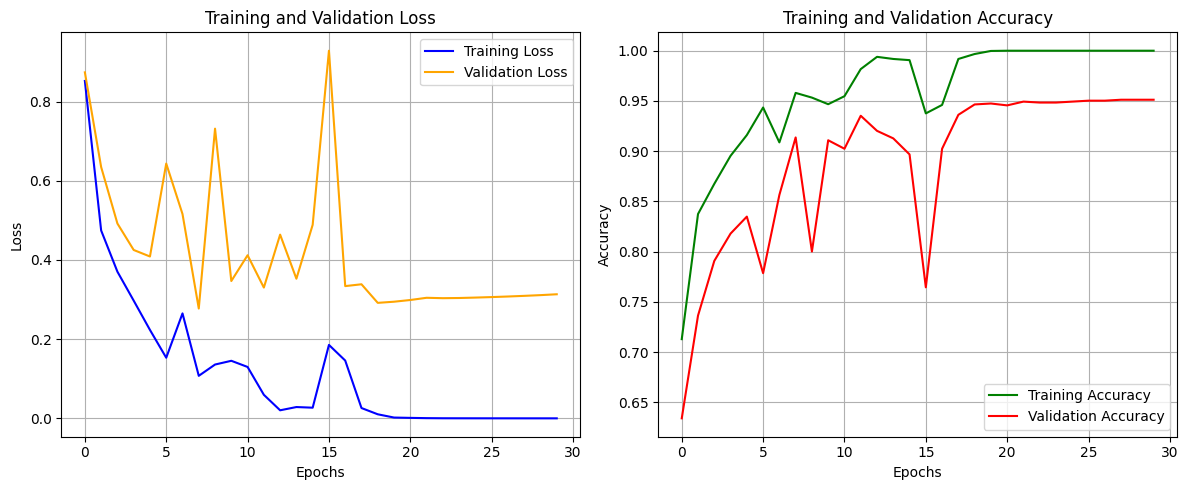

In [28]:
plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies)

In [32]:
model.load_state_dict(torch.load('densenet_only_cbam.pth'))
all_labels, all_preds = evaluate_model(model, val_loader)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


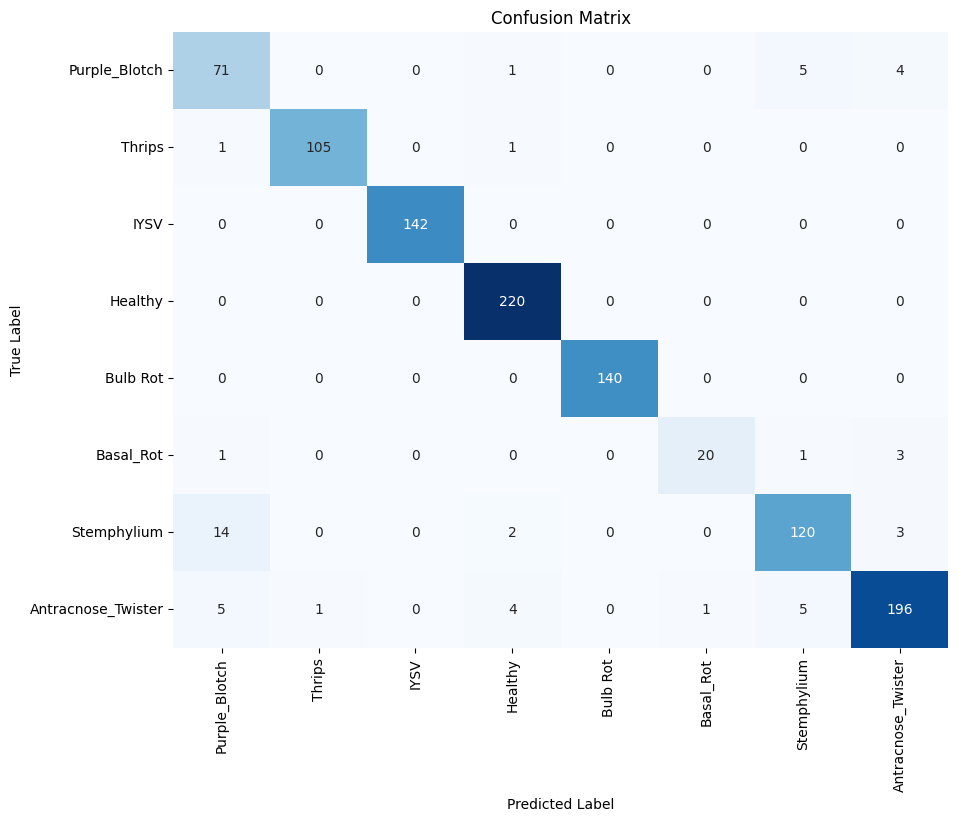

Total Accuracy: 95.12%
Class 'Purple_Blotch' Accuracy: 87.65%
Class 'Thrips' Accuracy: 98.13%
Class 'IYSV' Accuracy: 100.00%
Class 'Healthy' Accuracy: 100.00%
Class 'Bulb Rot' Accuracy: 100.00%
Class 'Basal_Rot' Accuracy: 80.00%
Class 'Stemphylium' Accuracy: 86.33%
Class 'Antracnose_Twister' Accuracy: 92.45%


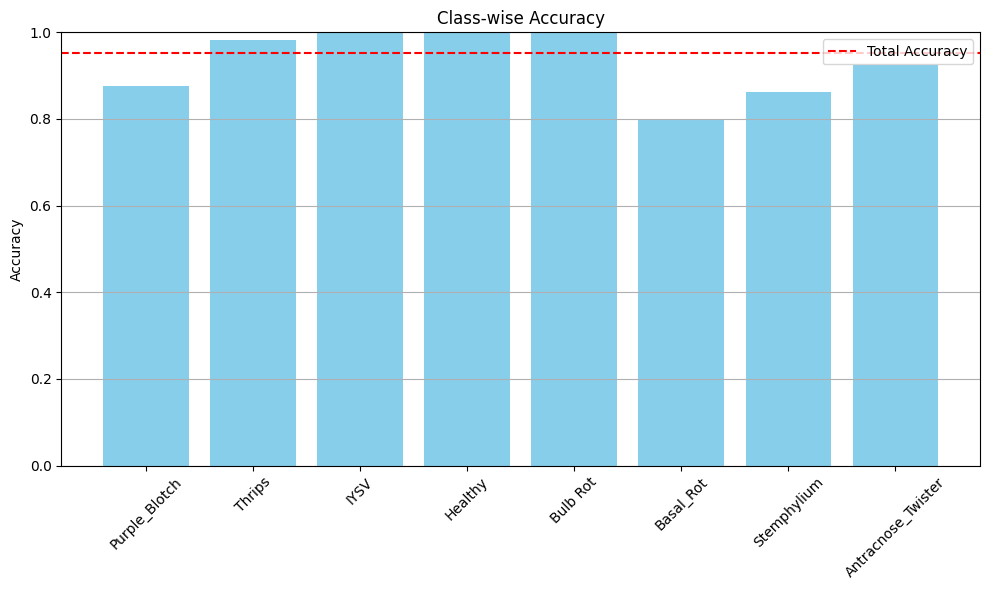

In [33]:
class_names = list(jpg_paths_comb_dict.keys()) 
cm = confusion_matrix(all_labels, all_preds)
num_classes=len(jpg_paths_comb_dict)
plot_confusion_matrix(cm, num_classes, class_names)
plot_classwise_accuracy(cm, jpg_paths_comb_dict)